# AFM analisis

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
file_path_current = r"H:\Seafile\Master\Data\AFM\2025-12-08_ValenciaTests\Valencia-p_Struktur-6-2_Current"
file_path_topography = r"H:\Seafile\Master\Data\AFM\2025-12-08_ValenciaTests\Valencia-p_Struktur-6-2_Topography"

topography_array = np.loadtxt(file_path_topography, delimiter=None)
current_array = np.loadtxt(file_path_current, delimiter=None)

In [9]:
physical_width = 40   # x in µm
physical_height = 40  # y in µm

ny, nx = topography_array.shape

x_1d = np.linspace(0, physical_width, nx)
y_1d = np.linspace(0, physical_height, ny)

X, Y = np.meshgrid(x_1d, y_1d)

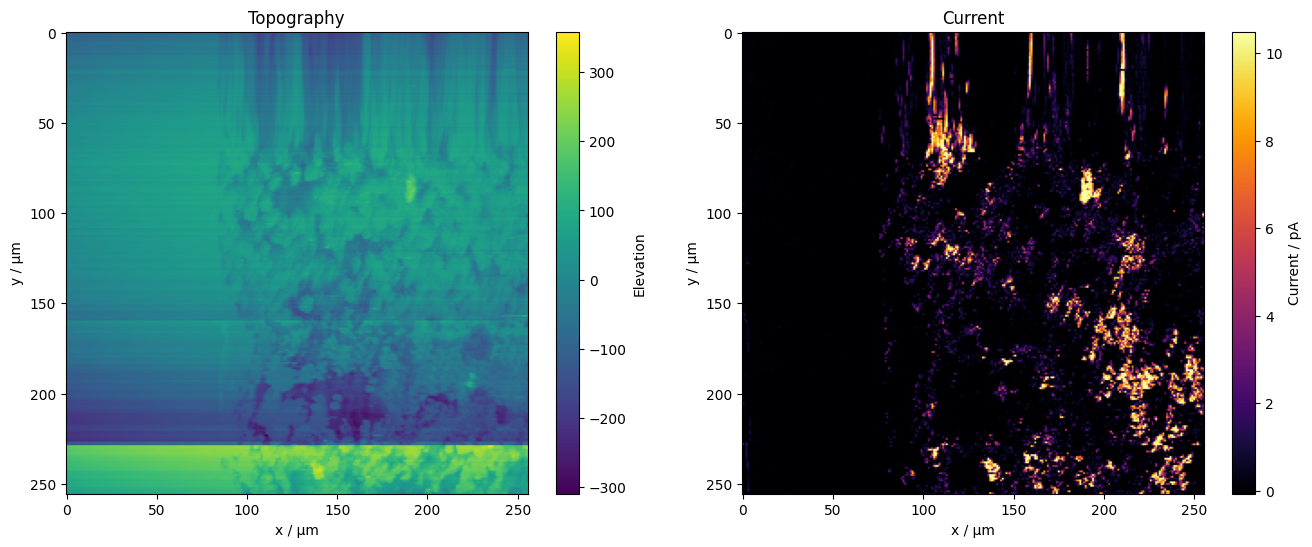

In [17]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
topography = ax1.imshow(topography_array, cmap='viridis')
cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pad=0.05
cbar1.set_label('Elevation')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")

ax2 = fig.add_subplot(1,2,2)
current = ax2.imshow(current_array, cmap='inferno')  # plasma inferno
cbar2 = plt.colorbar(current, ax=ax2, fraction=0.045, pad=0.05)
cbar2.set_label('Current / pA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()

### combine topography with current colormap

In [28]:
def process_topograhy_data(topography):
    # Destriping (Line Flattening)
    topo_flattened = topography - np.median(topography, axis=1, keepdims=True)
    
    # Smooth the Topography by applaying a filter
    topo_smooth = gaussian_filter(topo_flattened, sigma=1)

    return topo_smooth

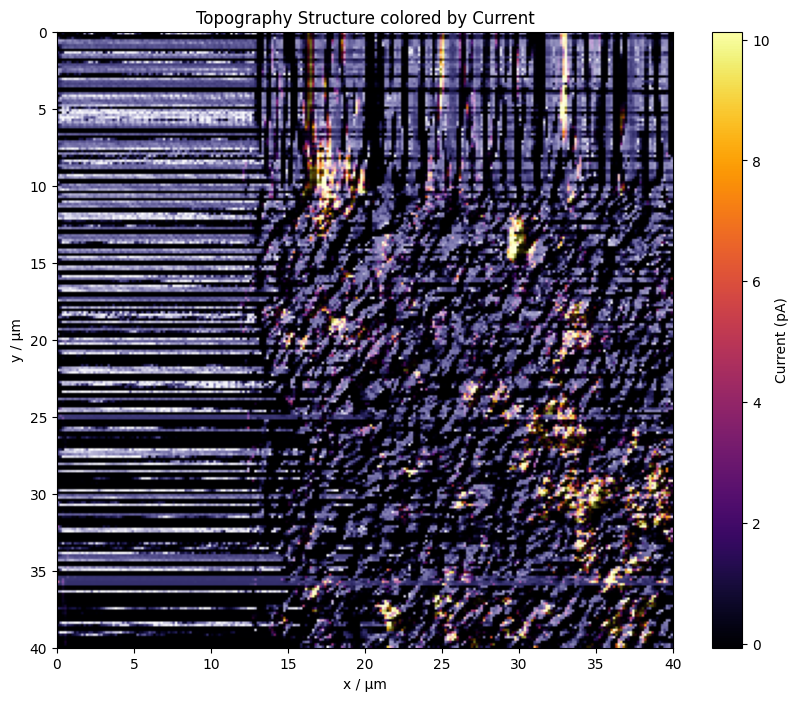

In [34]:
from matplotlib.colors import LightSource, Normalize
# convert current array to colormap
# Normalize the current data to 0.0 - 1.0
# vmin/vmax clip the outliers so the weak currents are still visible
norm = Normalize(vmin=current_array.min(), vmax=np.percentile(current_array, 99)) # Using 99th percentile clips extreme hot spots
cmap = plt.cm.inferno 
current_rgb = cmap(norm(current_array))

# LightSource creates the 3D shadow effect
ls = LightSource(azdeg=315, altdeg=45)

final_image = ls.shade_rgb(current_rgb, elevation=topography_array)    #  vert_exag=0.5, blend_mode='overlay'

# # hide pixels where topography is between -5 and 5 => declutter topography
# hidden_mask = (topography_array > -20) & (topography_array < 20)
# # final_image is an array of shape (Height, Width, 4) -> (R, G, B, Alpha)
# # 4th channel (index 3) set it to 0 (transparent)
# final_image[hidden_mask, 3] = 0.0

fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(final_image, origin='upper', extent=[0, physical_width, physical_height, 0])

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Current (pA)')

ax.set_title("Topography Structure colored by Current")
ax.set_xlabel("x / µm")
ax.set_ylabel("y / µm")

plt.show()

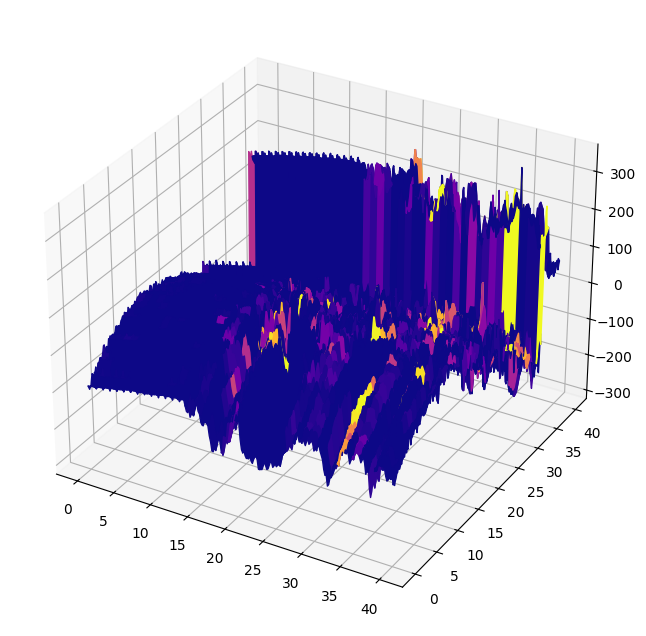

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))

# Create the facecolors based on the Current array
norm = plt.Normalize(current_array.min(), current_array.max())
colors = plt.cm.plasma(norm(current_array))

# Plot surface: Z=Topography, Facecolors=Current
surf = ax.plot_surface(X, Y, topography_array, facecolors=colors, shade=False)

plt.show()